In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
from wordcloud import WordCloud

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
train=pd.read_csv('kaggle/input/daigt-proper-train-dataset/train_v2_drcat_02.csv')
train_1=pd.read_csv('kaggle/input/llm-detect-ai-generated-text/train_essays.csv')

In [4]:
train.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [5]:
train_1.head()


,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


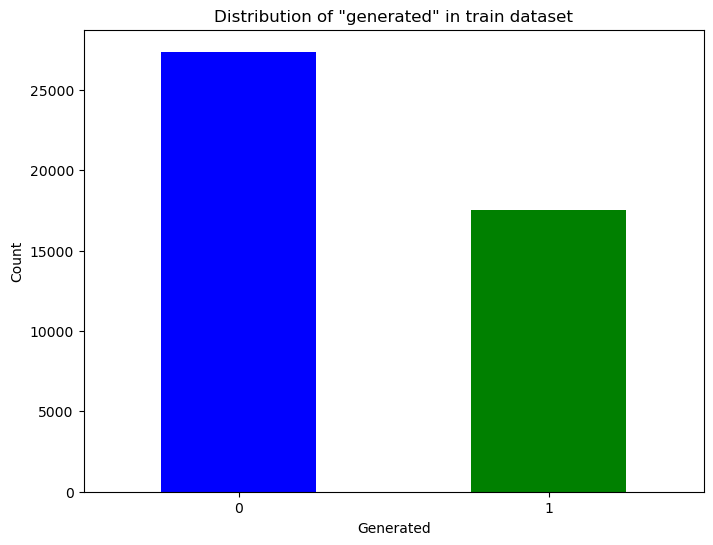

In [6]:
plt.figure(figsize=(8,6))
train['label'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "generated" in train dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

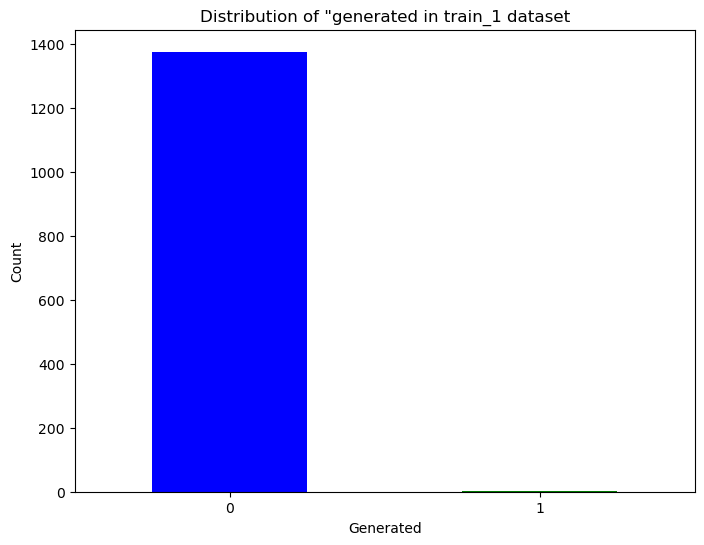

In [7]:
plt.figure(figsize=(8,6))
train_1['generated'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "generated in train_1 dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [8]:
import pandas as pd

#selecting columns from train dataset
train_selected = train[['text', 'label']].copy()

train_1_selected = train_1[['text', 'generated']].rename(columns={'generated': 'label'}).copy() 
#selecting cols from train_1 dataset and changing generated to match label column

combined_data = pd.concat([train_selected, train_1_selected], ignore_index=True)

print(combined_data)

                                                    text  label
0      Phones\n\nModern humans today are always on th...      0
1      This essay will explain if drivers should or s...      0
2      Driving while the use of cellular devices\n\nT...      0
3      Phones & Driving\n\nDrivers should not be able...      0
4      Cell Phone Operation While Driving\n\nThe abil...      0
...                                                  ...    ...
46241  There has been a fuss about the Elector Colleg...      0
46242  Limiting car usage has many advantages. Such a...      0
46243  There's a new trend that has been developing f...      0
46244  As we all know cars are a big part of our soci...      0
46245  Cars have been around since the 1800's and hav...      0

[46246 rows x 2 columns]


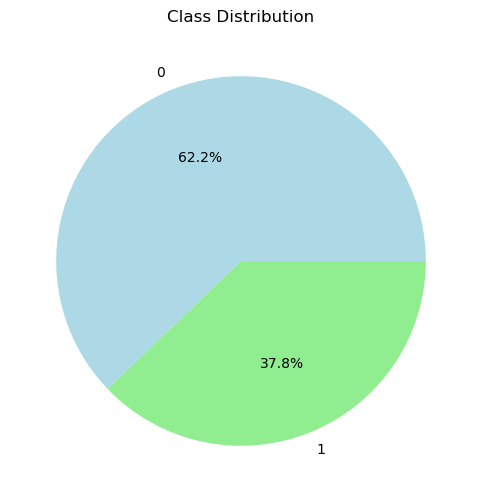

In [9]:
import matplotlib.pyplot as plt
class_distribution = combined_data['label'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Class Distribution')
plt.show()

In [10]:
# Checking for duplicates in combined_data
duplicate_rows = combined_data[combined_data.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)


# Checking for null values in combined_data
null_values = combined_data.isnull().sum()
print("\nNull Values:")
print(null_values)

# Dropping duplicates and null values from combined_data
combined_data.drop_duplicates(inplace=True)
combined_data.dropna(inplace=True)

# Confirming the removal of duplicates and null values
print("\nAfter Dropping:")
print(combined_data.shape)  # Check the shape after dropping

Duplicate Rows:
                                                    text  label
44868  Cars. Cars have been around since they became ...      0
44869  Transportation is a large necessity in most co...      0
44870  "America's love affair with it's vehicles seem...      0
44871  How often do you ride in a car? Do you drive a...      0
44872  Cars are a wonderful thing. They are perhaps o...      0
...                                                  ...    ...
46241  There has been a fuss about the Elector Colleg...      0
46242  Limiting car usage has many advantages. Such a...      0
46243  There's a new trend that has been developing f...      0
46244  As we all know cars are a big part of our soci...      0
46245  Cars have been around since the 1800's and hav...      0

[1378 rows x 2 columns]

Null Values:
text     0
label    0
dtype: int64

After Dropping:
(44868, 2)


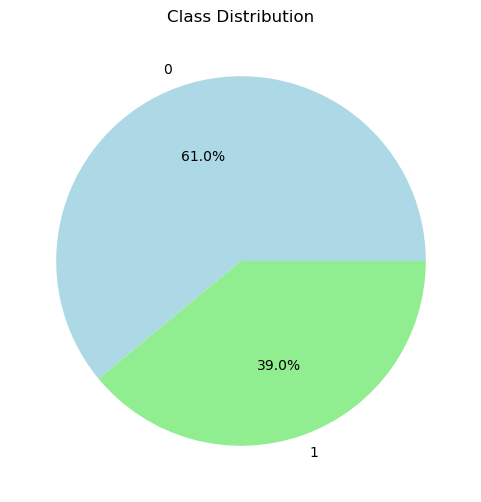

In [11]:
class_distribution = combined_data['label'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Class Distribution')
plt.show()

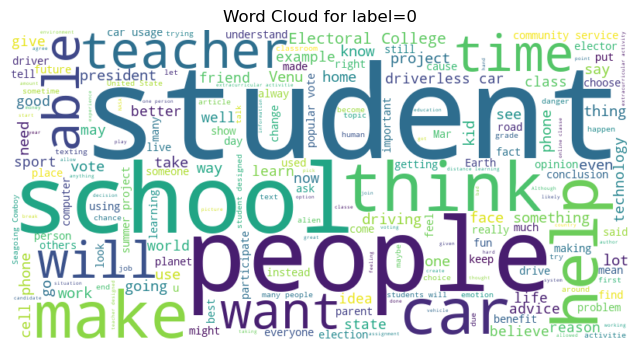

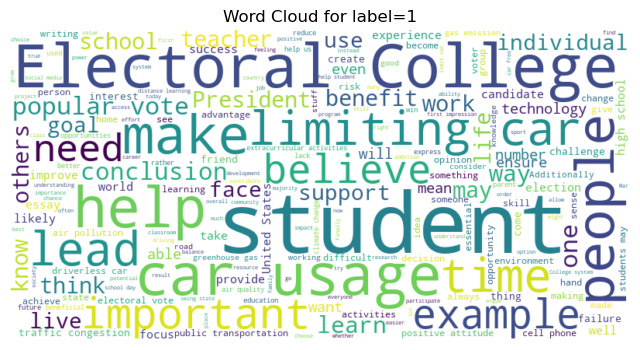

In [12]:
# Filter the combined data based on label values
label_0_text = ' '.join(combined_data[combined_data['label'] == 0]['text'])
label_1_text = ' '.join(combined_data[combined_data['label'] == 1]['text'])

# Generate word clouds
wordcloud_0 = WordCloud(width=800, height=400, background_color='white').generate(label_0_text)
wordcloud_1 = WordCloud(width=800, height=400, background_color='white').generate(label_1_text)


# Plotting word cloud for label=0
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.title('Word Cloud for label=0')
plt.axis('off')
plt.show()

# Plotting word cloud for label=1
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.title('Word Cloud for label=1')
plt.axis('off')
plt.show()

#helps identify most important/used words in dataset

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Tokenize and create TF-IDF vectors for the 'text' column of the combined dataset
tfidf_vectors = tfidf_vectorizer.fit_transform(combined_data['text'])

# Convert TF-IDF vectors to a DataFrame for easy analysis
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

#prepares data for machine learning/statistical analysis

    00       000   10  100   11  114  118   12   13   14  ...      your  \
0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.193019   
2  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3  0.0  0.060816  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   

   yours  yourself  youth  youtube  zip  zone  zones  zoos  zygomatic  
0    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
1    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
2    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
3    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  
4    0.0       0.0    0.0      0.0  0.0   0.0    0.0   0.0        0.0  

[5 rows x 5000 columns]


In [14]:
# Split the data into training and testing sets
X = tfidf_df.values  # Features (TF-IDF vectors)
y = combined_data['label'].values  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Encode target labels (0 and 1) using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [16]:
# Build a simple neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded), verbose=1)

Epoch 1/10


2024-07-15 11:39:28.378233: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1122/1122 [==============================] - 3s 3ms/step - loss: 0.0505 - accuracy: 0.9804 - val_loss: 0.0174 - val_accuracy: 0.9942
Epoch 2/10
1122/1122 [==============================] - 2s 2ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0207 - val_accuracy: 0.9948
Epoch 3/10
1122/1122 [==============================] - 3s 2ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0205 - val_accuracy: 0.9952
Epoch 4/10
1122/1122 [==============================] - 3s 2ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0203 - val_accuracy: 0.9957
Epoch 5/10
1122/1122 [==============================] - 2s 2ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0311 - val_accuracy: 0.9922
Epoch 6/10
1122/1122 [==============================] - 3s 2ms/step - loss: 5.5143e-04 - accuracy: 0.9998 - val_loss: 0.0488 - val_accuracy: 0.9929
Epoch 7/10
1122/1122 [==============================] - 3s 2ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0310 - val_accuracy: 0.9945

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {test_accuracy:.4f}')

281/281 [==============================] - 0s 877us/step - loss: 0.0337 - accuracy: 0.9959
Test Accuracy: 0.9959


In [19]:
from sklearn.metrics import classification_report, roc_auc_score

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

281/281 [==============================] - 0s 881us/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5481
           1       1.00      0.99      0.99      3493

    accuracy                           1.00      8974
   macro avg       1.00      1.00      1.00      8974
weighted avg       1.00      1.00      1.00      8974

ROC-AUC Score: 0.9997


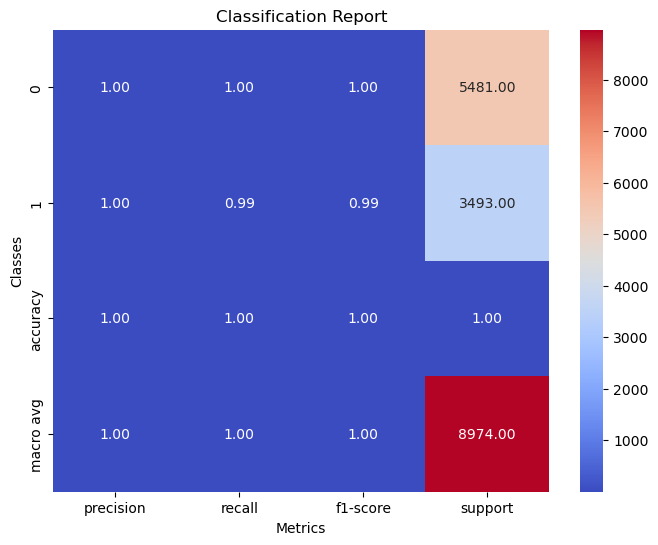

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Calculate classification report
report = classification_report(y_test_encoded, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

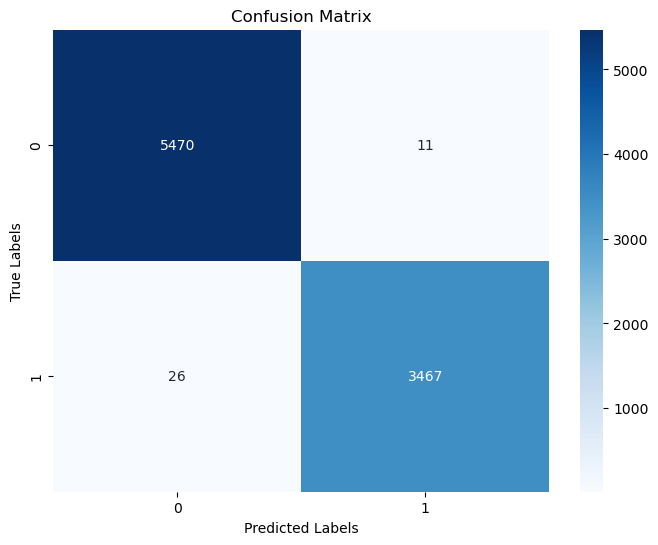

In [21]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [23]:
df_new_generated_prompts = pd.read_csv("kaggle/input/daigt-proper-train-dataset/train_essays_v1.csv")
df_gpt_semantic = pd.read_csv("kaggle/my_datasets/gpt_semantic.csv")
df_gpt_prompt1 = pd.read_csv("kaggle/my_datasets/gpt_prompt1.csv")
df_gpt_prompt2 = pd.read_csv("kaggle/my_datasets/gpt_prompt2.csv")
df_claude = pd.read_csv("kaggle/my_datasets/claude.csv")
df_gpt_writing = pd.read_csv("kaggle/my_datasets/gpt_writing.csv")
df_gpt = pd.read_csv("kaggle/my_datasets/gpt.csv")
df_human = pd.read_csv("kaggle/my_datasets/human.csv")
df_human2 = pd.read_csv("kaggle/my_datasets/human2.csv")
df_human3 = pd.read_csv("kaggle/my_datasets/human3.csv")

In [24]:
df_ghostbuster_essays_final = pd.concat([
    df_gpt_semantic[["text", "label"]],
    df_gpt_prompt1[["text", "label"]],
    df_gpt_prompt2[["text", "label"]],
    df_claude[["text", "label"]],
    df_gpt_writing[["text", "label"]],
    df_gpt[["text", "label"]],
    df_human[["text", "label"]],
    df_human2[["text", "label"]],
    df_human3[["text", "label"]]
])

df_ghostbuster_essays_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8994 non-null   object
 1   label   9000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 210.9+ KB


In [26]:
df_new_test_set = pd.concat([df_new_generated_prompts[["text", "label"]], df_ghostbuster_essays_final[["text", "label"]]])

df_new_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12500 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12494 non-null  object
 1   label   12500 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 293.0+ KB


In [27]:
# Checking for duplicates in combined_data
duplicate_rows = df_new_test_set[df_new_test_set.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)


# Checking for null values in combined_data
null_values = df_new_test_set.isnull().sum()
print("\nNull Values:")
print(null_values)

# Dropping duplicates and null values from combined_data
df_new_test_set.drop_duplicates(inplace=True)
df_new_test_set.dropna(inplace=True)

# Confirming the removal of duplicates and null values
print("\nAfter Dropping:")
print(df_new_test_set.shape)  # Check the shape after dropping

Duplicate Rows:
    text  label
132  NaN      0
564  NaN      0
616  NaN      0
750  NaN      0
945  NaN      0

Null Values:
text     6
label    0
dtype: int64

After Dropping:
(12494, 2)


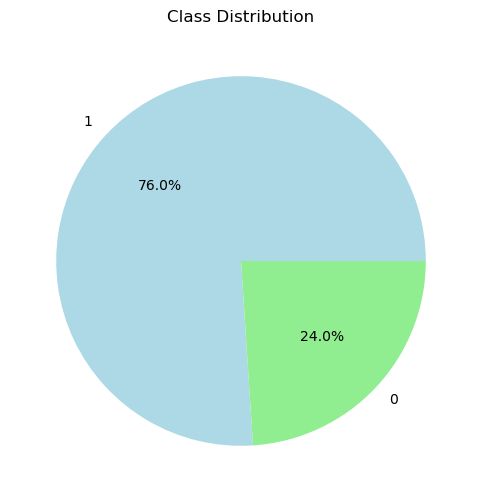

In [28]:
class_distribution = df_new_test_set['label'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Class Distribution')
plt.show()

In [42]:

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Tokenize and create TF-IDF vectors for the 'text' column of the combined dataset
tfidf_vectors = tfidf_vectorizer.fit_transform(df_new_test_set['text'])

# Convert TF-IDF vectors to a DataFrame for easy analysis
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

#prepares data for machine learning/statistical analysis

   000   10  100   11   12   13   14   15  150   16  ...  york  you  young  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  0.0    0.0   

   younger  your  yourself  youth  zero  zone  zones  
0      0.0   0.0       0.0    0.0   0.0   0.0    0.0  
1      0.0   0.0       0.0    0.0   0.0   0.0    0.0  
2      0.0   0.0       0.0    0.0   0.0   0.0    0.0  
3      0.0   0.0       0.0    0.0   0.0   0.0    0.0  
4      0.0   0.0       0.0    0.0   0.0   0.0    0.0  

[5 rows x 5000 columns]


In [50]:
# Split the data into training and testing sets
X = tfidf_df.values  # Features (TF-IDF vectors)
y = df_new_test_set['label'].values  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42)

In [51]:
# Encode target labels (0 and 1) using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [52]:
# Train the model
history = model.fit(X_train, y_train_encoded, epochs=1, batch_size=32, validation_data=(X_test, y_test_encoded), verbose=1)

4/4 [==============================] - 1s 199ms/step - loss: 4.4531e-04 - accuracy: 1.0000 - val_loss: 0.4617 - val_accuracy: 0.9141


In [54]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {test_accuracy:.4f}')

387/387 [==============================] - 0s 975us/step - loss: 0.4617 - accuracy: 0.9141
Test Accuracy: 0.9141


In [55]:
# Predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate and print classification report
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred))

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_encoded, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

387/387 [==============================] - 0s 777us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.80      2964
           1       0.92      0.97      0.95      9406

    accuracy                           0.91     12370
   macro avg       0.90      0.85      0.87     12370
weighted avg       0.91      0.91      0.91     12370

ROC-AUC Score: 0.9532


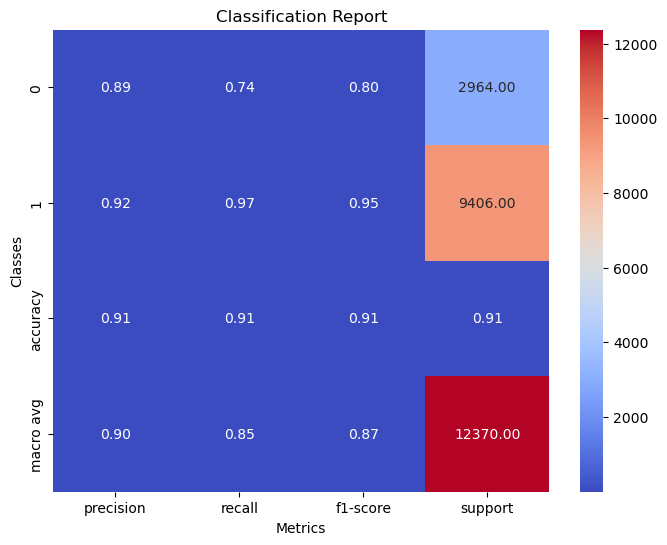

In [59]:
from sklearn.metrics import confusion_matrix, f1_score

# Calculate classification report
report = classification_report(y_test_encoded, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting the classification report as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Classification Report')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()
f1 = f1_score(y_test_encoded, y_pred)


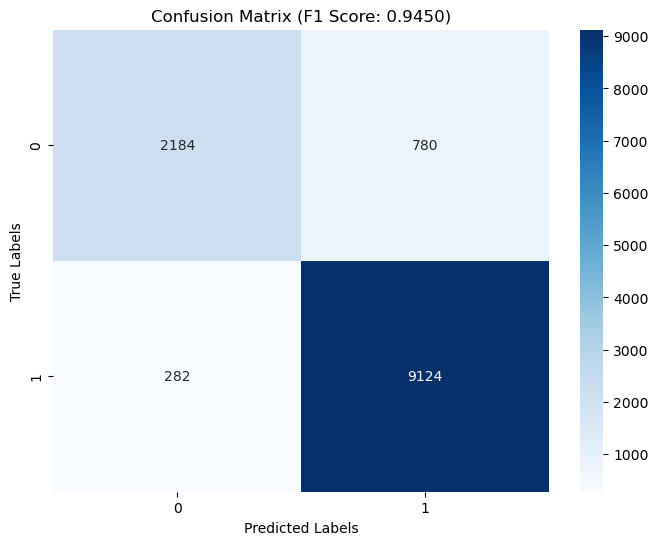

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

# Assuming y_test_encoded and y_pred are your true and predicted labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Calculate the F1 score
f1 = f1_score(y_test_encoded, y_pred)

# Plotting the confusion matrix as a heatmap with F1 score in the title
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (F1 Score: {f1:.4f})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the plot as an image file
plt.savefig('confusion_matrix_with_f1_score.png')

# Show the plot
plt.show()
